In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [74]:
# import cleaned dataset from last project - https://github.com/SarahNadeau/datascience-projectB/blob/master/cleaned.csv
data = pd.DataFrame.from_csv('cleaned.csv')
encoded_data = pd.DataFrame.from_csv('cleaned.csv')

# create meaningful encodings for ordinal data
BsmtQual = data['BsmtQual']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    BsmtQual = BsmtQual.replace(key, encodings[key])
data['BsmtQual'] = BsmtQual

ExterQual = data['ExterQual']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    ExterQual = ExterQual.replace(key, encodings[key])
data['ExterQual'] = ExterQual
    
ExterCond = data['ExterCond']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    ExterCond = ExterCond.replace(key, encodings[key])
data['ExterCond'] = ExterCond
    
BsmtCond = data['BsmtCond']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    BsmtCond = BsmtCond.replace(key, encodings[key])
data['BsmtCond'] = BsmtCond
    
KitchenQual = data['KitchenQual']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    KitchenQual = KitchenQual.replace(key, encodings[key])
data['KitchenQual'] = KitchenQual
    
GarageQual = data['GarageQual']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    GarageQual = GarageQual.replace(key, encodings[key])
data['GarageQual'] = GarageQual

FireplaceQu = data['FireplaceQu']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    FireplaceQu = FireplaceQu.replace(key, encodings[key])
data['FireplaceQu'] = FireplaceQu

LandSlope = data['LandSlope']
encodings = {'Gtl': 1, 'Mod': 2, 'Sev': 3}
for key in encodings:
    LandSlope = LandSlope.replace(key, encodings[key])
data['LandSlope'] = LandSlope

HeatingQC = data['HeatingQC']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    HeatingQC = HeatingQC.replace(key, encodings[key])
data['HeatingQC'] = HeatingQC

BsmtExposure = data['BsmtExposure']
encodings = {'Gd': 6, 'Av': 5, 'Mn': 4, 'No': 3, 'NA': 2, 'NP': 1}
for key in encodings:
    BsmtExposure = BsmtExposure.replace(key, encodings[key])
data['BsmtExposure'] = BsmtExposure

GarageCond = data['GarageCond']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    GarageCond = GarageCond.replace(key, encodings[key])
data['GarageCond'] = GarageCond

PoolQC = data['PoolQC']
encodings = {'Ex': 4, 'Gd': 3, 'Fa': 2, 'NP' :1}
for key in encodings:
    PoolQC = PoolQC.replace(key, encodings[key])
data['PoolQC'] = PoolQC

# use label encoder for nominal data columns
enc = LabelEncoder()
for col in data.columns:
    if data[col].dtype != 'float64' and data[col].dtype != 'int64': 
        encoded_data[col] = enc.fit_transform(encoded_data[col])
    else:
        encoded_data[col] = data[col]

In [75]:
# make sale price a categorical feature
labels = [ "{0} - {1}".format(i, i + 100000) for i in range(0, 1000000, 100000) ]
encoded_data['Sale_Price_Categories'] = pd.cut(encoded_data.SalePrice, range(0, 1050000, 100000), right=False, labels=labels)

In [76]:
# find numerical features with significant correlation to SalePrice
columns = encoded_data.columns
column_dtypes = encoded_data.dtypes
numerical_types = [np.int64, np.int32, np.float32, np.float64]

valid_col = [columns[i] for i in range(len(columns)) if column_dtypes[i] in numerical_types]
X = pd.DataFrame(encoded_data, columns = valid_col)
corr = np.corrcoef(X, rowvar=False)
sale_price_corr_coef = corr[-1][:-1]  # get SalePrice corrcoef with everything else

significant_col = []  
significant_col_values = []
sig_threshold = 0.0 # arbitrarily set
for i in range(len(sale_price_corr_coef)):
    corr_coef = sale_price_corr_coef[i]
    if abs(corr_coef) >= sig_threshold:
        significant_col.append(valid_col[i])
        significant_col_values.append(corr_coef)
print("\nBelow are the columns (and correlation coefficients) that have been deemed significant \n" + 
      "(absolute coefficient >= {}) and will be used in the model:\n".format(sig_threshold))
for i in range(len(significant_col)):
    print("{}. {}: {:.2f}".format(i+1, significant_col[i], significant_col_values[i]))
    
feature_set = encoded_data.filter(significant_col)
feature_set['Sale_Price_Categories'] = encoded_data['Sale_Price_Categories']
# feature_set = encoded_data


Below are the columns (and correlation coefficients) that have been deemed significant 
(absolute coefficient >= 0.0) and will be used in the model:

1. MSSubClass: -0.08
2. MSZoning: -0.17
3. LotFrontage: 0.21
4. LotArea: 0.26
5. Street: 0.04
6. Alley: 0.08
7. LotShape: -0.25
8. LandContour: 0.02
9. Utilities: -0.01
10. LotConfig: -0.07
11. LandSlope: 0.05
12. Neighborhood: 0.21
13. Condition1: 0.09
14. Condition2: 0.01
15. BldgType: -0.09
16. HouseStyle: 0.18
17. OverallQual: 0.79
18. OverallCond: -0.08
19. YearBuilt: 0.52
20. YearRemodAdd: 0.51
21. RoofStyle: 0.22
22. RoofMatl: 0.13
23. Exterior1st: 0.10
24. Exterior2nd: 0.10
25. MasVnrType: -0.07
26. MasVnrArea: 0.34
27. ExterQual: 0.68
28. ExterCond: 0.02
29. Foundation: 0.38
30. BsmtQual: 0.59
31. BsmtCond: 0.21
32. BsmtExposure: 0.38
33. BsmtFinType1: -0.10
34. BsmtFinSF1: 0.39
35. BsmtFinType2: 0.07
36. BsmtFinSF2: -0.01
37. BsmtUnfSF: 0.21
38. TotalBsmtSF: 0.62
39. Heating: -0.10
40. HeatingQC: 0.43
41. CentralAir: 0.25
42. E

In [77]:
# split into training and testing sets
Y = feature_set['Sale_Price_Categories']
X_train, X_test, Y_train, Y_test = train_test_split(feature_set, Y, test_size=.1)

X_train = X_train.drop('Sale_Price_Categories', 1)
X_test = X_test.drop('Sale_Price_Categories', 1)

In [78]:
# calculate the baseline for SalePrice
baseline = encoded_data.Sale_Price_Categories.describe()['freq']/len(encoded_data.Sale_Price_Categories)
print("% of most frequent category as baseline is: {:.2f}".format(baseline))

% of most frequent category as baseline is: 0.62


In [79]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 9001

KFold mean:
0.995873758036
KFold variance:
5.39181102373e-05
Shuffle Split mean:
0.992694063927
Shuffle Split variance:
1.66802193449e-06


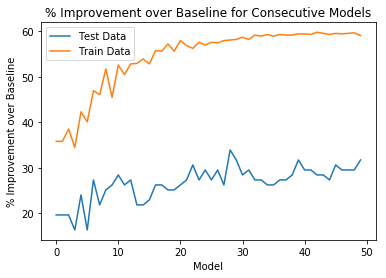

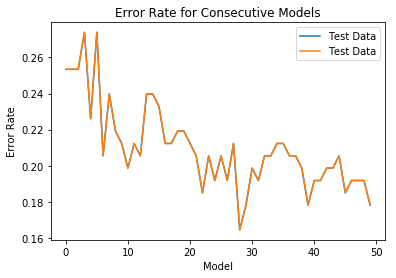

31.74% final improvement over the baseline


In [80]:
# define ensemble hyperparameters
max_depth = 5
n_estimators = 50

boosted_tree = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth), algorithm="SAMME", 
                                  n_estimators=n_estimators, random_state = seed)
model = boosted_tree.fit(X_train, Y_train)

# plot improvement for train and test sets for each model
test_staged_improvement = []
test_staged_error = []
for predictions in model.staged_predict(X_test):
    successes = 0
    for i in range(0, len(predictions)):
        if predictions[i] == Y_test.iloc[i]:
            successes += 1
    error = (len(Y_test) - successes)/len(Y_test)
    test_staged_error.append(error)
    success_rate = successes/len(Y_test)
    improvement = (success_rate - baseline)*100/baseline
    test_staged_improvement.append(improvement)

train_staged_improvement = []
train_staged_error = []
for predictions in model.staged_predict(X_train):
    successes = 0
    for i in range(0, len(predictions)):
        if predictions[i] == Y_train.iloc[i]:
            successes += 1
    error = (len(Y_train) - successes)/len(Y_train)
    train_staged_error.append(error)
    success_rate = successes/len(Y_train)
    improvement = (success_rate - baseline)*100/baseline
    train_staged_improvement.append(improvement)
    
kfold = KFold(n_splits=25, random_state = 5)
results = cross_val_score(model, X, Y, cv=kfold)
print('KFold mean:')
print(results.mean())
print('KFold variance:')
print(results.var())

ss = ShuffleSplit(n_splits=3, test_size=0.25, random_state=220)
results1 = cross_val_score(model, X, Y, cv=ss)
print('Shuffle Split mean:')
print(results1.mean())
print('Shuffle Split variance:')
print(results1.var())

plt.plot(test_staged_improvement, label='Test Data')
plt.plot(train_staged_improvement, label='Train Data')
plt.title("% Improvement over Baseline for Consecutive Models")
plt.xlabel("Model")
plt.ylabel("% Improvement over Baseline")
plt.legend()
plt.show()

plt.plot(test_staged_error, label='Test Data')
plt.plot(test_staged_error, label='Test Data')
plt.title("Error Rate for Consecutive Models")
plt.xlabel("Model")
plt.ylabel("Error Rate")
plt.legend()
plt.show()

predictions = model.predict(X_test)
successes = 0
for i in range(0, len(predictions)):
    if predictions[i] == Y_test.iloc[i]:
        successes += 1
success_rate = successes/len(Y_test)
print("{:.2f}% final improvement over the baseline".format((success_rate - baseline)*100/baseline))

32% maximum improvement using only most relevant columns (corr coef > 0.5)
35% improvement using all columns
*improvement will increase with increased max depth of trees, but the plot starts to look wonky

for validation that the improvement/error plots look okay: http://people.csail.mit.edu/dsontag/courses/ml12/slides/lecture13.pdf